In [21]:
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch
import cmasher as cmr

In [22]:
cmap_dict = cmr.cm.cmap_cd
all_cmap_dict = {}
for cmap_type_key in cmap_dict:
    for key, cmap in cmap_dict[cmap_type_key].items():
        if key[-2:] != '_r':
            all_cmap_dict[key] = cmap

In [3]:
final = sb.events(3943077)

In [4]:
df_enzo = final[final["player"]=="Enzo Fernandez"]

In [5]:
df_enzo[['x', 'y']] = df_enzo.location.apply(pd.Series)
df_enzo[['end_x', 'end_y']] = df_enzo.pass_end_location.apply(pd.Series)
df_enzo[['x', 'y', 'location']]

C:\Users\pc\AppData\Local\Temp\ipykernel_8176\853299117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enzo[['x', 'y']] = df_enzo.location.apply(pd.Series)
C:\Users\pc\AppData\Local\Temp\ipykernel_8176\853299117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enzo[['x', 'y']] = df_enzo.location.apply(pd.Series)
C:\Users\pc\AppData\Local\Temp\ipykernel_8176\853299117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,x,y,location
11,48.6,41.0,"[48.6, 41.0]"
18,54.1,50.6,"[54.1, 50.6]"
47,46.9,53.6,"[46.9, 53.6]"
52,37.6,25.9,"[37.6, 25.9]"
54,29.9,22.4,"[29.9, 22.4]"
...,...,...,...
3993,23.5,50.9,"[23.5, 50.9]"
4012,56.8,44.4,"[56.8, 44.4]"
4069,47.3,77.3,"[47.3, 77.3]"
4083,66.5,32.7,"[66.5, 32.7]"


C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\mplsoccer\_pitch_base.py:784: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


<Axes: >

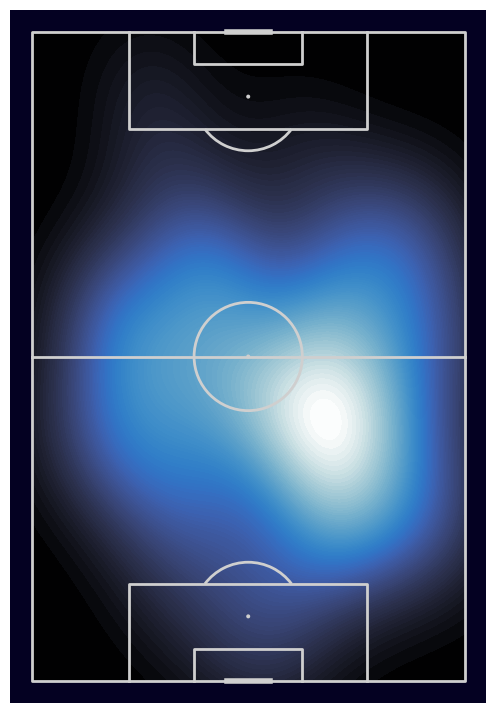

In [30]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(pitch_type='statsbomb', line_color='#cfcfcf', pitch_color="#040122")
pitch.draw(ax=ax)
pitch.kdeplot(
    df_enzo[df_enzo['type'] == 'Pass']['end_x'],
    df_enzo[df_enzo['type'] == 'Pass']['end_y'],
    ax=ax,
    levels = 100,
    fill=True,
    shade =True,
    zorder=-1,
    shade_lowest=True,
    cmap=cmr.arctic
)